# Building models for classifications using SVM (rbf, polynomial), Bagging, Boosting (AdaBoost and GradBoost) and tuning the hyperparameters 
# Comparing the results of all the models 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Differentiated Thyroid Cancer Recurrence Dataset
- https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence

In [3]:
thyroid_cancer_recurrence_ds = pd.read_csv("C:\\Users\\PRATEEK MITTAL\\OneDrive\\Desktop\\Machine_Learning\\differentiated+thyroid+cancer+recurrence\\Thyroid_Diff.csv")
print(thyroid_cancer_recurrence_ds.head())
thyroid_cancer_recurrence_ds.shape

   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0  

(383, 17)

## Descriptive Statistics :

In [4]:
thyroid_cancer_recurrence_ds.describe() 
# As .describe() gives descriptive statistics of numerical values in the dataset so here it is only returning the descriptive statistics of 'age' column.

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [5]:
thyroid_cancer_recurrence_ds.info()
# As the shape of the dataset is (387,17), therefore we can verify that there is no null value as there are 383 non-null values in all the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

## Converting all the non-numeric values to numeric values for both input and output.

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in thyroid_cancer_recurrence_ds.columns :
    thyroid_cancer_recurrence_ds[column] = le.fit_transform(thyroid_cancer_recurrence_ds[column])


## Slicing the dataset into input and output
- As the last column of our dataset is output, hence making every other column input as X and the last column output as y.

In [7]:
X = thyroid_cancer_recurrence_ds.iloc[:,:16].values
y = thyroid_cancer_recurrence_ds.iloc[:,16].values
X = pd.DataFrame(X)

In [8]:
print(y)
print(le.classes_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
['No' 'Yes']


## Splitting the dataset into training and testing dataset in the ratio of 8:2 respectively.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,stratify = y, random_state = 42)

## Feature Scaling :

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [11]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# SVM with RBF Kernel

## Base Model 

In [12]:
from sklearn.svm import SVC
svc_clf_rbf = SVC(kernel='rbf',C=5, gamma=0.5, random_state=42)
svc_clf_rbf.fit(X_train_std, y_train)
score_svc_rbf = svc_clf_rbf.score(X_test_std, y_test)
print(score_svc_rbf)

0.8051948051948052


Classification report for classifier SVC(C=5, gamma=0.5, random_state=42):
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        55
           1       1.00      0.32      0.48        22

    accuracy                           0.81        77
   macro avg       0.89      0.66      0.68        77
weighted avg       0.85      0.81      0.77        77




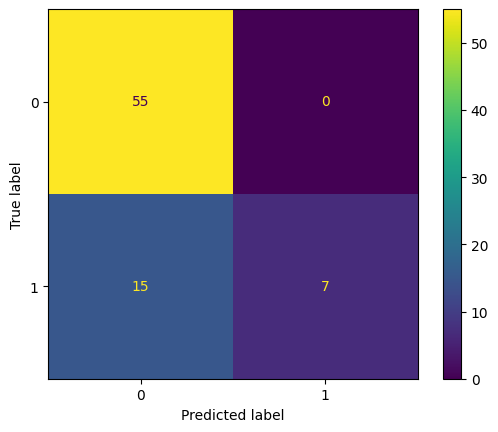

In [13]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = svc_clf_rbf.predict(X_test_std)

print("Classification report for classifier %s:\n%s\n"
      % (svc_clf_rbf, metrics.classification_report(y_test, y_pred)))

confMatrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)

disp.plot()
plt.show()

## Hyperparameter tuning for SVM
**Random Search**

In [14]:
# Base Estimator
hpt_svm_clf = SVC(kernel='rbf')

In [15]:
hpt_svm_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [16]:
hpt_param_dict = {
    'C':[i for i in range(1,20)],
    'gamma': np.linspace(0.1, 1, 10)
    }

In [17]:
hpt_param_dict

{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}

In [18]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = hpt_svm_clf,
                                   param_distributions=hpt_param_dict,
                                   cv=5)

In [19]:
random_search.fit(X_train_std, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                                        'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [20]:
random_search.best_params_

{'gamma': 0.1, 'C': 10}

In [21]:
random_search.best_score_

0.9248016922263351

**Grid Search**

In [22]:
# Specifying the parameter grid for tuning as list of dictionary according to the randomized search.

hpt_param_grid = [{'C':[i for i in range(5,16)],'gamma': np.linspace(0.1, 1, 10) }]
print(hpt_param_grid)

[{'C': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}]


In [23]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = hpt_svm_clf,
                           param_grid = hpt_param_grid,
                           cv = 5)
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                          'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}])

In [24]:
print(grid_search.best_params_)

{'C': 14, 'gamma': 0.1}


In [25]:
print(grid_search.best_score_)

0.9248016922263353


In [26]:
print(grid_search.best_estimator_)

SVC(C=14, gamma=0.1)


## Hyperparameter Tuned Model

In [27]:
svc_clf_rbf = SVC(kernel='rbf',C=14, gamma=0.1, random_state=42)

svc_clf_rbf.fit(X_train_std, y_train)
score_svc_rbf_hpt = svc_clf_rbf.score(X_test_std, y_test)

print(score_svc_rbf_hpt)

0.948051948051948


In [28]:
CV_results = grid_search.cv_results_
for mean_score, std_score, rank_score in zip(
    CV_results['mean_test_score'], CV_results['std_test_score'], CV_results['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.921523003701745 0.019267080913907827 8
0.8920676890534109 0.0397947349715659 12
0.8791644632469593 0.04195718457991883 23
0.8334214701216288 0.023337716190502313 34
0.8072448439978848 0.01525902113059421 45
0.7810153358011634 0.01352417015072348 56
0.761448968799577 0.016480551902220066 67
0.758223162347964 0.01830483757301556 78
0.7549444738233739 0.013788335050434464 89
0.7483870967741935 0.012578376518090718 100
0.9248016922263351 0.016847401836669676 3
0.8920676890534109 0.0397947349715659 12
0.8791644632469593 0.04195718457991883 23
0.8334214701216288 0.023337716190502313 34
0.8072448439978848 0.01525902113059421 45
0.7810153358011634 0.01352417015072348 56
0.761448968799577 0.016480551902220066 67
0.758223162347964 0.01830483757301556 78
0.7549444738233739 0.013788335050434464 89
0.7483870967741935 0.012578376518090718 100
0.9248016922263351 0.016847401836669676 3
0.8920676890534109 0.0397947349715659 12
0.8758857747223692 0.03651758904209174 25
0.8334214701216288 0.02333771619

# Bagging - Random Forest Classifier

## Base model 

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=25, n_jobs=-1, random_state=42)
rf_clf.fit(X_train_std, y_train)
score_rf = rf_clf.score(X_test_std, y_test)
print(score_rf)

0.961038961038961


Classification report for classifier RandomForestClassifier(max_depth=25, n_estimators=50, n_jobs=-1,
                       random_state=42):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       1.00      0.86      0.93        22

    accuracy                           0.96        77
   macro avg       0.97      0.93      0.95        77
weighted avg       0.96      0.96      0.96        77




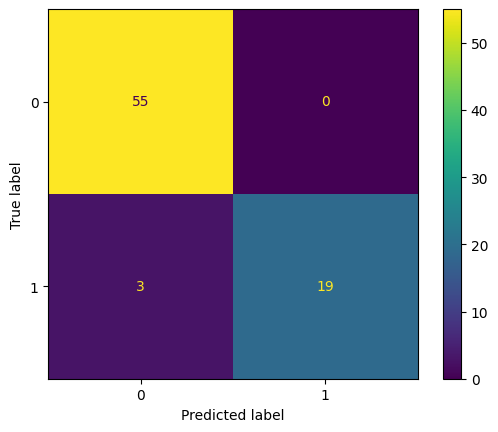

In [30]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = rf_clf.predict(X_test_std)

print("Classification report for classifier %s:\n%s\n"
      % (rf_clf, metrics.classification_report(y_test, y_pred)))

confMatrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)

disp.plot()
plt.show()

## Hyperparameter tuning for RandomForest
**Random Search**

In [31]:
hpt_rf_clf = RandomForestClassifier()

In [32]:
learnRate = [0.2, 0.3, 0.4, 0.5]
hpt_param_grid = [
    {'n_estimators':[i for i in range(10,101,10)],
     'max_depth': [j for j in range(2,15,2)]}
    ]

In [33]:
hpt_param_grid

[{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
  'max_depth': [2, 4, 6, 8, 10, 12, 14]}]

In [62]:
random_search = RandomizedSearchCV(estimator = hpt_rf_clf,
                                   param_distributions=hpt_param_grid,
                                   cv=5)

In [63]:
random_search.fit(X_train_std, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions=[{'max_depth': [2, 4, 6, 8, 10, 12, 14],
                                         'n_estimators': [10, 20, 30, 40, 50,
                                                          60]}])

In [64]:
random_search.best_score_

0.9640401903754625

In [65]:
random_search.best_estimator_

RandomForestClassifier(max_depth=14, n_estimators=50)

**Grid Search**

In [66]:
hpt_param_grid = [
    {'n_estimators':[i for i in range(30,71,10)],
     'max_depth': [j for j in range(2,15,2)]}
    ]
# According to the randomized search

In [67]:
hpt_param_grid

[{'n_estimators': [30, 40, 50, 60, 70], 'max_depth': [2, 4, 6, 8, 10, 12, 14]}]

In [68]:
grid_search = GridSearchCV(estimator = hpt_rf_clf,
                           param_grid = hpt_param_grid,
                           cv = 5)

In [69]:
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10, 12, 14],
                          'n_estimators': [30, 40, 50, 60, 70]}])

In [70]:
print(grid_search.best_params_)

{'max_depth': 8, 'n_estimators': 50}


In [71]:
print(grid_search.best_score_)

0.970597567424643


In [72]:
CV_results = grid_search.cv_results_

In [73]:
for mean_score, std_score, rank_score in zip(
    CV_results['mean_test_score'], CV_results['std_test_score'], CV_results['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.9281861448968799 0.016225061116629462 35
0.9411422527763088 0.01323700716840782 31
0.9378635642517187 0.0192290154140681 32
0.9314119513484929 0.0189430051611313 33
0.9313590692755156 0.012331391884845644 34
0.9542570068746695 0.01603295150640904 26
0.9574828133262823 0.016781540746947602 21
0.9542041248016921 0.012382086412613194 29
0.9574828133262823 0.016781540746947602 21
0.9574828133262823 0.016781540746947602 21
0.9640401903754625 0.021765325888161473 8
0.9640401903754627 0.019137173945101706 5
0.9575356953992596 0.016658776300030553 20
0.9640401903754625 0.021765325888161473 8
0.9607615018508724 0.016760864370853733 12
0.9574828133262823 0.019726076504319203 21
0.9574828133262823 0.016781540746947602 21
0.970597567424643 0.021733438297960473 1
0.9672659968270756 0.020778281020431142 4
0.9607615018508724 0.016760864370853733 12
0.9542570068746695 0.02172674625507575 26
0.9640401903754627 0.019137173945101706 5
0.9607615018508724 0.022269318428810057 12
0.9673188789000529 0.0231

## Hypertuned Model

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=8, n_jobs=-1, random_state=42)
rf_clf.fit(X_train_std, y_train)
score_rf_hpt = rf_clf.score(X_test_std, y_test)
print(score_rf_hpt)

0.961038961038961


# Adaptive Boosting 

## Base Model 

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100,
                             algorithm="SAMME", learning_rate=0.5)
ada_clf.fit(X_train,y_train)

c:\Users\PRATEEK MITTAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=100)

In [184]:
score_ada_clf = ada_clf.score(X_test,y_test)
score_ada_clf

0.974025974025974

Classification report for classifier AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=100):
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        55
           1       0.00      0.00      0.00        22

    accuracy                           0.71        77
   macro avg       0.36      0.50      0.42        77
weighted avg       0.51      0.71      0.60        77




c:\Users\PRATEEK MITTAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PRATEEK MITTAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PRATEEK MITTAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

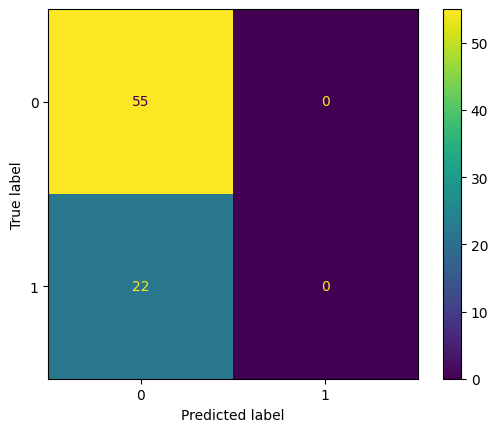

In [49]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = ada_clf.predict(X_test_std)

print("Classification report for classifier %s:\n%s\n"
      % (ada_clf, metrics.classification_report(y_test, y_pred)))

confMatrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)

disp.plot()
plt.show()

## Hyperparameter Tuning For AdaBoosting 
**Random Search**

In [90]:
hpt_ada_clf = AdaBoostClassifier()

In [83]:
hpt_param_grid = [
    {'n_estimators':[i for i in range(10,101,10)],
     'learning_rate': [j for j in np.linspace(0.1,1,10)]}
    ]


In [92]:
random_search = RandomizedSearchCV(estimator = hpt_ada_clf,
                                   param_distributions=hpt_param_grid,
                                   cv=5)

In [93]:
random_search.fit(X_train_std, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions=[{'learning_rate': [0.1, 0.2,
                                                           0.30000000000000004,
                                                           0.4, 0.5, 0.6,
                                                           0.7000000000000001,
                                                           0.8, 0.9, 1.0],
                                         'n_estimators': [10, 20, 30, 40, 50,
                                                          60, 70, 80, 90,
                                                          100]}])

In [94]:
random_search.best_params_

{'n_estimators': 100, 'learning_rate': 0.6}

**Grid Search**

In [125]:
hpt_param_grid = [
    {'n_estimators':[i for i in range(80,121,10)],
     'learning_rate': [j for j in np.linspace(0.1,1,10)]}
    ]
# This is a short range according to the random search result.

In [126]:
grid_search = GridSearchCV(estimator = hpt_ada_clf,
                           param_grid = hpt_param_grid,
                           cv = 5)

In [127]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid=[{'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4,
                                            0.5, 0.6, 0.7000000000000001, 0.8,
                                            0.9, 1.0],
                          'n_estimators': [80, 90, 100, 110, 120]}])

In [128]:
print(grid_search.best_params_)

{'learning_rate': 0.7000000000000001, 'n_estimators': 120}


In [129]:
print(grid_search.best_score_)

0.970597567424643


In [145]:
CV_results = grid_search.cv_results_

In [146]:
for mean_score, std_score, rank_score in zip(
    CV_results['mean_test_score'], CV_results['std_test_score'], CV_results['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.9542041248016921 0.012382086412613194 43
0.9542041248016921 0.012382086412613194 43
0.9542041248016921 0.012382086412613194 43
0.9542041248016921 0.012382086412613194 43
0.9542041248016921 0.012382086412613194 43
0.9542041248016921 0.012382086412613194 43
0.9542041248016921 0.012382086412613194 43
0.9574828133262823 0.016781540746947602 38
0.9574828133262823 0.016781540746947602 38
0.9509783183500794 0.01796091945668432 50
0.9574828133262823 0.024578731925789805 38
0.9607615018508726 0.02456461942910027 36
0.9640401903754627 0.021765325888161473 16
0.9608143839238498 0.022169133802769154 26
0.9640401903754627 0.021765325888161473 16
0.9640401903754627 0.021765325888161473 16
0.9608143839238498 0.022169133802769154 26
0.9640930724484399 0.024008927048503294 15
0.9640401903754627 0.021765325888161473 16
0.9608143839238498 0.022169133802769154 26
0.9608143839238498 0.022169133802769154 26
0.9608143839238498 0.022169133802769154 26
0.9608143839238498 0.022169133802769154 26
0.96081438392

## Hypertuned Model

In [130]:
ada_clf_hpt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=120,
                             algorithm="SAMME", learning_rate=0.7)
ada_clf_hpt.fit(X_train,y_train)

c:\Users\PRATEEK MITTAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.7, n_estimators=120)

In [177]:
score_ada_clf_hpt = ada_clf_hpt.score(X_test,y_test)
score_ada_clf_hpt

0.948051948051948

# Gradient boosting 

## Base Model

In [181]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate= 1.0)
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=3)

In [182]:
score_gb_clf = gb_clf.score(X_test,y_test)
score_gb_clf

0.961038961038961

## Hyperparameter Tuning for Gradient Boosting
**Random Search**

In [141]:
hpt_gb_clf = GradientBoostingClassifier()

In [152]:
hpt_param_grid = [
    {'n_estimators':[i for i in range(10,101,10)],
     'max_depth': [j for j in range(2,15,2)]}
    ]

In [153]:
hpt_param_grid

[{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
  'max_depth': [2, 4, 6, 8, 10, 12, 14]}]

In [154]:
random_search = RandomizedSearchCV(estimator=hpt_gb_clf, param_distributions= hpt_param_grid,
                                   cv=5)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions=[{'max_depth': [2, 4, 6, 8, 10, 12, 14],
                                         'n_estimators': [10, 20, 30, 40, 50,
                                                          60, 70, 80, 90,
                                                          100]}])

In [155]:
random_search.best_params_

{'n_estimators': 40, 'max_depth': 2}

In [156]:
random_search.best_score_

0.9574828133262823

**Grid Search**

In [ ]:
hpt_param_grid = [
    {'n_estimators':[i for i in range(20,61,10)],
     'max_depth': [j for j in range(2,15,2)]}
    ]
hpt_param_grid
# The Grid is defined according to the results from random search.

[{'n_estimators': [20, 30, 40, 50, 60], 'max_depth': [2, 4, 6, 8, 10, 12, 14]}]

In [162]:
grid_search = GridSearchCV(estimator = hpt_gb_clf,
                           param_grid = hpt_param_grid,
                           cv = 5)

In [163]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10, 12, 14],
                          'n_estimators': [20, 30, 40, 50, 60]}])

In [164]:
print(grid_search.best_params_)

{'max_depth': 2, 'n_estimators': 40}


In [165]:
print(grid_search.best_score_)

0.9574828133262823


In [166]:
print(grid_search.best_estimator_)

GradientBoostingClassifier(max_depth=2, n_estimators=40)


In [167]:
CV_results = grid_search.cv_results_

In [168]:
for mean_score, std_score, rank_score in zip(
    CV_results['mean_test_score'], CV_results['std_test_score'], CV_results['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.9542041248016921 0.012382086412613194 4
0.9542041248016921 0.012382086412613194 4
0.9574828133262823 0.016781540746947602 1
0.9574828133262823 0.013195534298719025 1
0.9574828133262823 0.013195534298719025 1
0.9378635642517187 0.006874669487043895 7
0.9346377578001057 0.00042305658381804897 12
0.9280274986779482 0.024685451357581042 22
0.9345319936541513 0.027558410493729632 16
0.9378106821787414 0.02189241179231605 8
0.9410893707033315 0.01688454283532735 6
0.9313590692755156 0.016110903457920336 18
0.9345848757271286 0.01810514134449976 13
0.9345848757271286 0.01810514134449976 13
0.9313061872025383 0.016258464119700923 19
0.931253305129561 0.0263753812043834 20
0.9280274986779482 0.022402533881565906 22
0.9378106821787414 0.016256743993148026 8
0.9378106821787414 0.016256743993148026 8
0.9279746166049708 0.026792795037890463 28
0.9345319936541511 0.027558410493729632 17
0.9345848757271285 0.010620742642524125 15
0.9280274986779482 0.022402533881565906 22
0.9280274986779482 0.02240

## Hypertuned Model

In [172]:
gb_clf_hpt = GradientBoostingClassifier(max_depth=2, n_estimators=40, learning_rate= 1.0)
gb_clf_hpt.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=40)

In [180]:
score_gb_clf_hpt = gb_clf_hpt.score(X_test, y_test)
score_gb_clf_hpt

0.935064935064935

# Final Report 

In [186]:
LogisticRegression = 0.935064935064935 
SVM_linear = 0.94
SVM_Polynomial = 0.71

# The above scores of t he models are taken from the previous phase submissions.

In [ ]:
score_dict = {"Models" : ["Logistic Regression","SVM_Linear","SVM_Polynomial",
                          "SVM_rbf","SVM_rbf_hpt","Random Forest","Random Forest_hpt",
                          "AdaBoosting","AdaBoosting_hpt","GradientBoosting",
                          "GradientBoosting_hpt"], "Scores" : [LogisticRegression,SVM_linear,
                           SVM_Polynomial,score_svc_rbf,score_svc_rbf_hpt,score_rf,score_rf_hpt,
                           score_ada_clf,score_ada_clf_hpt,score_gb_clf,score_gb_clf_hpt
                            ]}


{'Models': ['Logistic Regression', 'SVM_Linear', 'SVM_Polynomial', 'SVM_rbf', 'SVM_rbf_hpt', 'Random Forest', 'Random Forest_hpt', 'AdaBoosting', 'AdaBoosting_hpt', 'GradientBoosting', 'GradientBoosting_hpt'], 'Scores': [0.935064935064935, 0.94, 0.71, 0.8051948051948052, 0.948051948051948, 0.961038961038961, 0.961038961038961, 0.974025974025974, 0.948051948051948, 0.961038961038961, 0.935064935064935]}


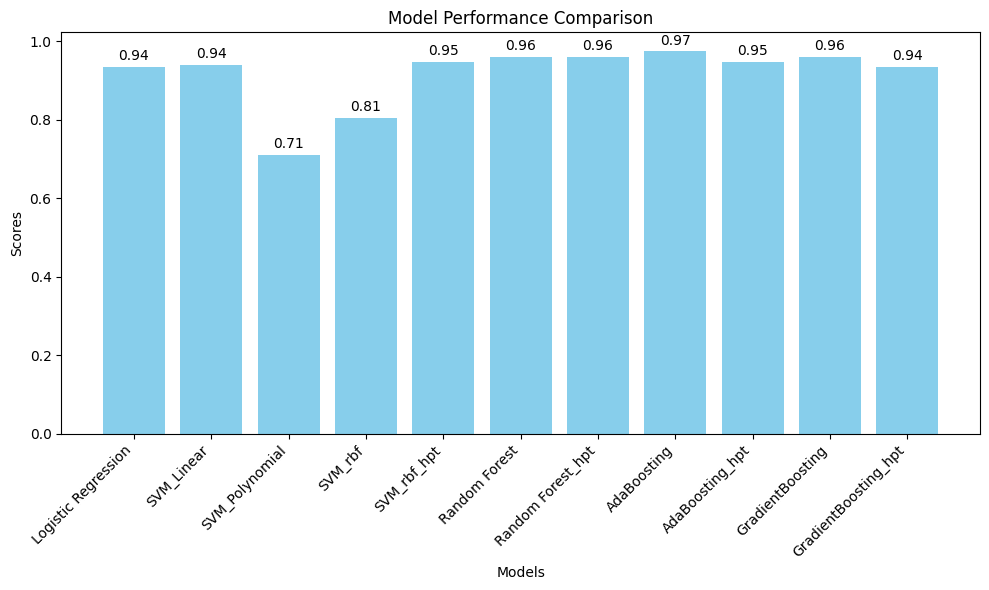

In [189]:
models = score_dict["Models"]
scores = score_dict["Scores"]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, scores, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


## The above shown scores are 'Accuracy'.

As the dataset has only two classes and can be classified using binary classifiers also, therefore both logistic regression and linear svm are giving good and close scores. The dataset is also easily linearly seperable, therefore making it polynomial gives poor result.
Ensemble learning models are giving better results than the baeline models and their hypertuned versions are giving more robust results.